In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importing data

In [107]:
data=pd.read_csv('Country-data.csv')

In [108]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# analysing data

In [109]:
data.shape

(167, 10)

In [110]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [111]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [112]:
data.country.nunique()

167

In [113]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

<AxesSubplot:>

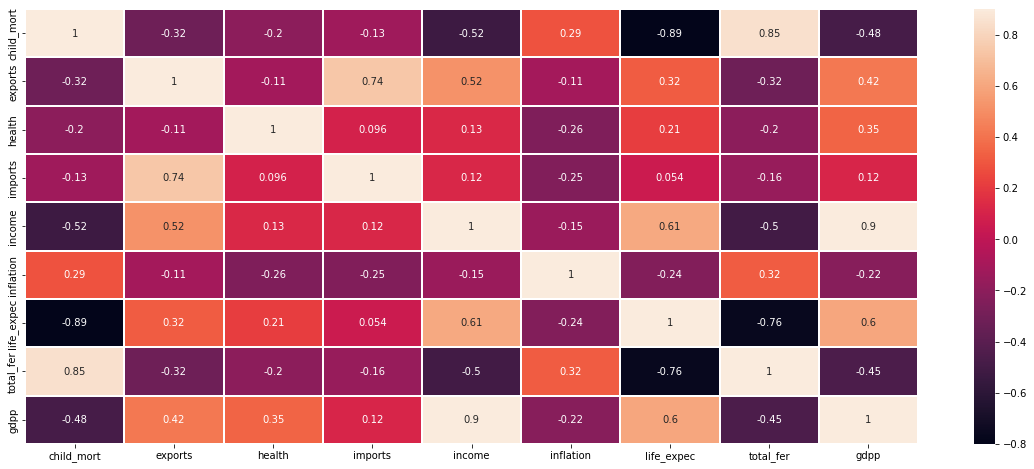

In [114]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.8,vmax=0.9,annot=True,linewidths=0.2)

# standard scaling

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1 = scaler.fit_transform(data.drop('country',axis=1))

In [116]:
data1 = pd.DataFrame(data1, columns = data.columns[1::1])
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# silhouette score

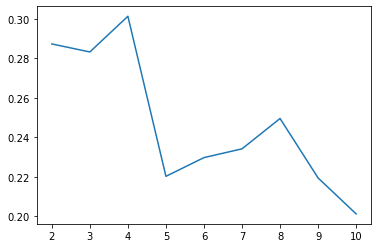

In [117]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(data1)
    ss.append([k, silhouette_score(data1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1]);

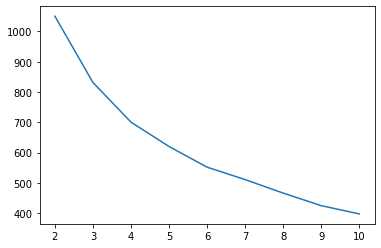

In [118]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(data1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1]);

# silhouette analysis

In [119]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data1)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.28735668921406704
For n_clusters=3, the silhouette score is 0.28329575683463126
For n_clusters=4, the silhouette score is 0.29595170577528157
For n_clusters=5, the silhouette score is 0.22237180677008042
For n_clusters=6, the silhouette score is 0.22355189579545645
For n_clusters=7, the silhouette score is 0.22056725550752757
For n_clusters=8, the silhouette score is 0.21724113505189238


optimal cluster = 3

In [120]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(data1)

KMeans(n_clusters=3, random_state=50)

In [121]:
country_kmean = data

In [122]:
label  = pd.DataFrame(kmean.labels_, columns= ['cluster_id'])
label.head()

,cluster_id
0,1
1,2
2,2
3,1
4,2


In [123]:
country_kmean = pd.concat([country_kmean, label], axis =1)
country_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


# k Mean clustering

In [124]:
country_kmean.cluster_id.value_counts()

2    84
1    47
0    36
Name: cluster_id, dtype: int64

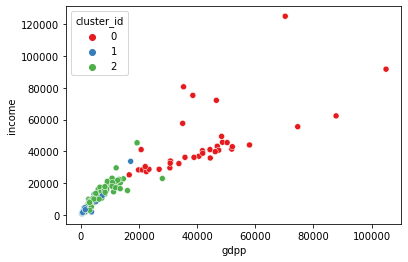

In [125]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = country_kmean, palette = 'Set1');

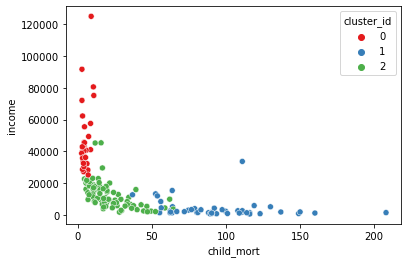

In [126]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = country_kmean, palette = 'Set1');

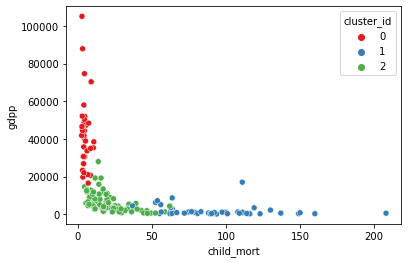

In [127]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = country_kmean, palette = 'Set1');

<AxesSubplot:xlabel='cluster_id'>

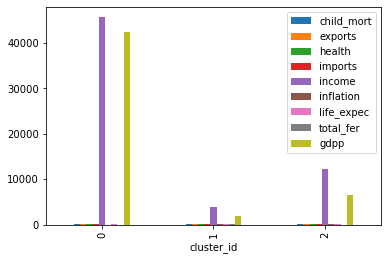

In [128]:
country_kmean.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

<AxesSubplot:xlabel='cluster_id'>

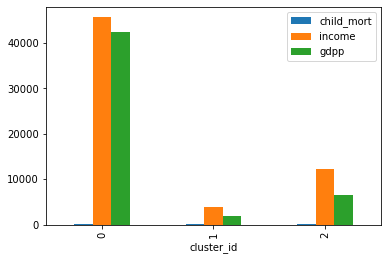

In [129]:
country_kmean.drop(['country', 'exports', 'health', 'imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

C:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


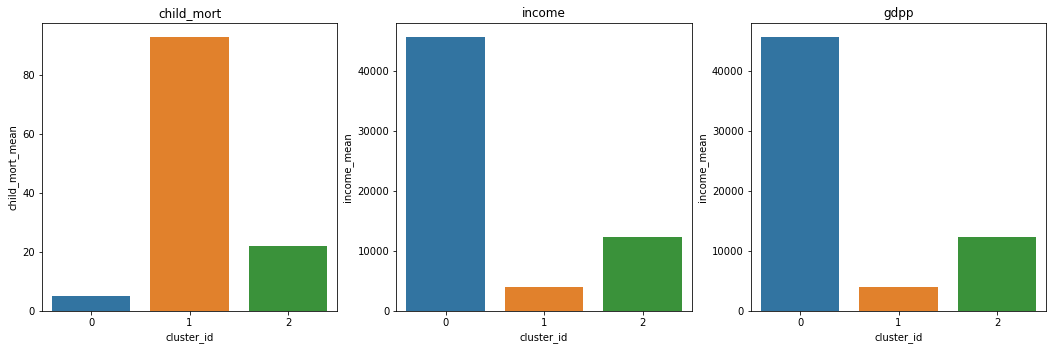

In [130]:
plt.figure(figsize = (18,18))
plt.figure(1)

plt.subplot(3, 3, 1)
plt.title("child_mort")
sns.barplot(country_analysis.cluster_id, country_analysis.child_mort_mean)

plt.subplot(3, 3, 2)
plt.title("income")
sns.barplot(country_analysis.cluster_id, country_analysis.income_mean)


plt.subplot(3, 3, 3)
plt.title("gdpp")
sns.barplot(country_analysis.cluster_id, country_analysis.income_mean)

plt.show()

cluster 1 is our cluster of concern

In [131]:
country_analysis.columns

Index(['cluster_id', 'child_mort_mean', 'exports_mean', 'health_mean',
       'imports_mean', 'income_mean', 'inflation_mean', 'life_expec_mean',
       'total_fer_mean', 'gdpp_mean'],
      dtype='object')

In [132]:
cluster_kmean_final = country_kmean[country_kmean['cluster_id']==1]
cluster_kmean_final.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1
